#Hair Mask Creation 
##create one mask along and save the image

# Import Libraries

In [2]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from keras.preprocessing import image


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
BASE_PATH = '/content/drive/MyDrive/HAM10000/HAM1/HAM10000_images_part_1/'
#list of images with hair
hair_images =['ISIC_0024553','ISIC_0024580','ISIC_0025175','ISIC_0025613','ISIC_0026242','ISIC_0024501','ISIC_0024584','ISIC_0024598','ISIC_0025868']

# viewing the images

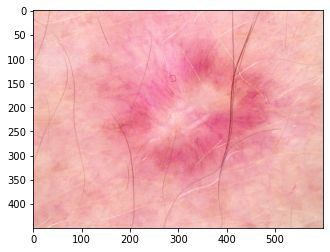

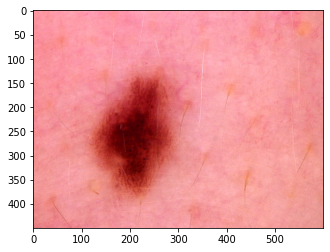

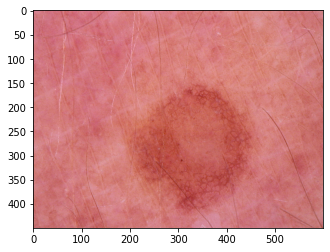

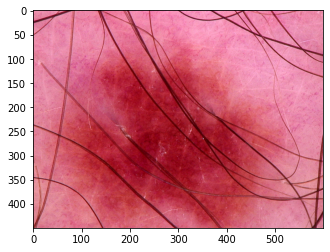

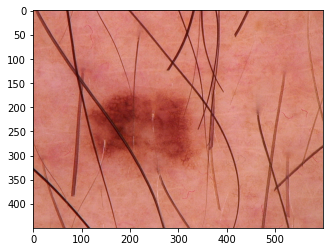

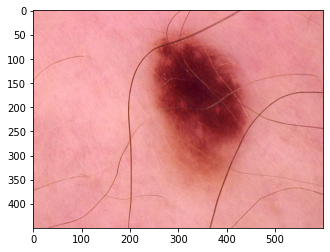

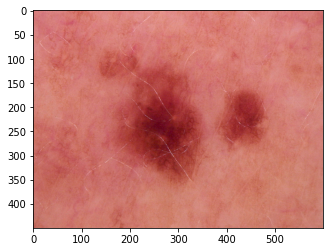

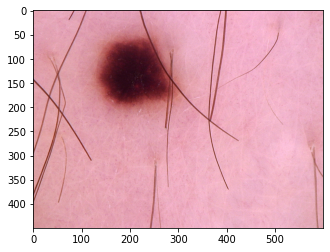

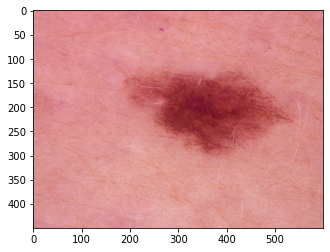

In [5]:
size=256

for img in hair_images:
    image = cv2.imread(BASE_PATH+img+'.jpg')
    image_resize = cv2.resize(image,(600,450))
    image_resize = cv2.cvtColor(image_resize,cv2.COLOR_BGR2RGB)
    plt.imshow(image_resize)
    plt.show()

# Extracting hair masks from images

* Experiment with `lower_limit` to get hair with removed noise
* Note that `lower_limit` is the sensitivity of the threshold of obtaining the mask.. too low value can lead to addition of noise and too high value can lead to loss of info of hair

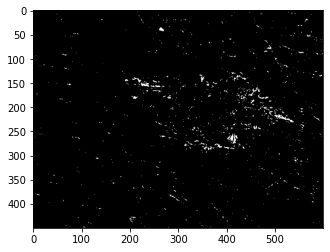

In [6]:
lower_limit = 20# the value that I found helpful

#*********#*********PROCEDURE*********#*********#*********#
###################################
grayScale = cv2.cvtColor(image_resize, cv2.COLOR_RGB2GRAY)

# Kernel for the morphological filtering
kernel = cv2.getStructuringElement(1,(17,17))

# Perform the blackHat filtering on the grayscale image to find the hair countours
blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)

# intensify the hair countours  
_ ,threshold = cv2.threshold(blackhat,20,255,cv2.THRESH_BINARY)
#######################################

plt.imshow(threshold,cmap = 'gray')


In [11]:
def img(image_name,lower_limit=20):    
    '''
    Helper Function to help us iterate with our code!!   
    
    
    '''

    image = cv2.imread(BASE_PATH +  image_name + '.jpg')
    image_resize = cv2.resize(image,(600,450))
   
    grayScale = cv2.cvtColor(image_resize, cv2.COLOR_RGB2GRAY)

    # Kernel for the morphological filtering
    kernel = cv2.getStructuringElement(1,(17,17))

    # Perform the blackHat filtering on the grayscale image to find the hair countours
    blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)

    # intensify the hair countours in preparation for the inpainting 
    _ ,threshold = cv2.threshold(blackhat,lower_limit,255,cv2.THRESH_BINARY)
    
    # inpaint the original image depending on the mask
    final_image = cv2.inpaint(image_resize,threshold,1,cv2.INPAINT_TELEA)
    
    #threshold = cv2.bitwise_not(threshold)
    image_resize = cv2.cvtColor(image_resize,cv2.COLOR_BGR2RGB)
    final_image = cv2.cvtColor(final_image,cv2.COLOR_BGR2RGB)
    
    return image_resize,threshold,final_image

## STEP 1) getting the first image

In [18]:
image_1,_,_ = img(hair_images[5]) 

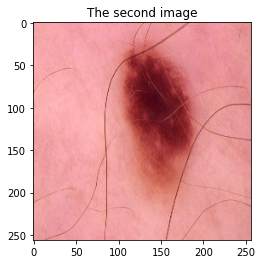

In [19]:
plt.title('The second image')
plt.imshow(image_1)
plt.show()

## STEP 2) getting the second image and it's hair mask

In [12]:
image_2,hair_mask_2,_ = img(hair_images[7])

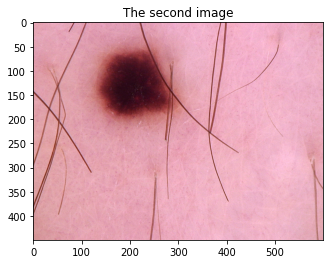

In [13]:
plt.title('The second image')
plt.imshow(image_2)
plt.show()

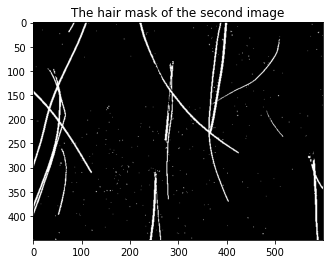

In [14]:
plt.title('The hair mask of the second image')
plt.imshow(hair_mask_2,cmap = 'binary_r')
plt.show()
from PIL import Image
im = Image.fromarray(hair_mask_2)
im.save("ISIC_0024598_mask.jpeg")


## STEP 3) applying the hair mask of image 2 one on image 1

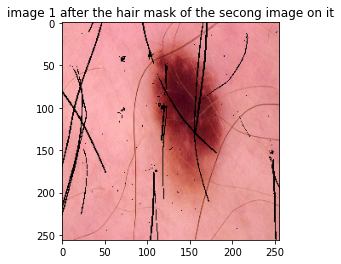

In [16]:
plt.title('image 1 after the hair mask of the secong image on it')
plt.imshow(cv2.bitwise_and(image_1,image_1,mask = hair_mask_2))

### looks good to me!!

## Let's look for the best quality hair(s) for later use

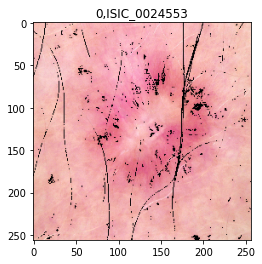

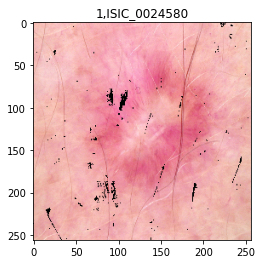

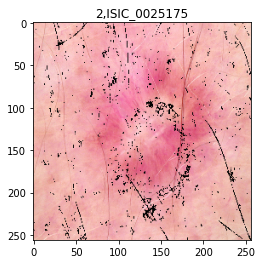

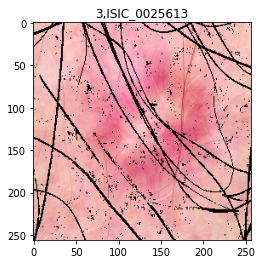

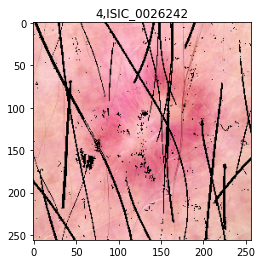

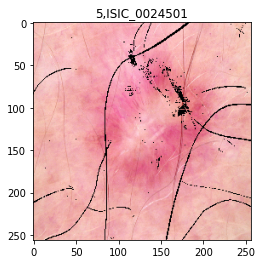

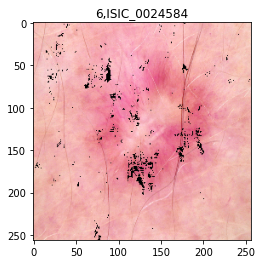

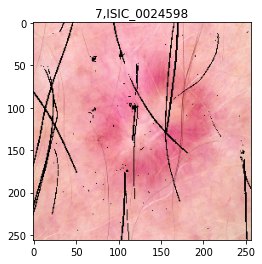

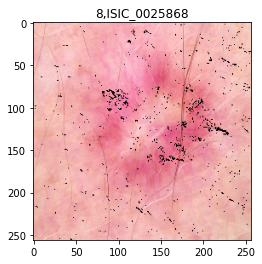

In [ ]:
for i,img_name in enumerate(hair_images) :
    _,hair_mask,_ = img(img_name)
    plt.title(f'{i},{img_name}')
    plt.imshow(cv2.bitwise_and(image_1,image_1,mask = hair_mask))
    plt.show()

### selecting the possible candidates for hairs that can be used for our images

In [ ]:
possible_cands = [0,1,3,4,6,9,13]# possible candidates 

In [ ]:
all_hair_masks = []

In [ ]:
import numpy as np
from PIL import Image

array = np.arange(0, 737280, 1, np.uint8)
array = np.reshape(array, (1024, 720))

im = Image.fromarray(all_hair_masks)
im.save("filena.jpeg")

AttributeError: ignored

In [ ]:
im = image.fromarray(all_hair_masks)
im.save("hair masks.jpeg")

AttributeError: ignored

In [ ]:
for i,img_id in enumerate(possible_cands):
    _,hair_masks,_ = img(hair_images[img_id])
    all_hair_masks.append(hair_masks) 
    cv2.imwrite(f'image_{i}.jpg',hair_masks)
    print(len(all_hair_masks))

NameError: ignored

In [ ]:
all_hair_masks = np.array(all_hair_masks)

## Note: We save the hairs as an array as there is often loss of info with images

In [ ]:
np.save('hair_array.npy',all_hair_masks.astype(np.uint8))